# **By: Priyanshu Porwal**

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [47]:
data = pd.read_csv('BankChurners.csv')

In [ ]:
data.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  
0       12691.0                  777             1144              42  
1        8256.0                  864             1291              33  
2        3418.0                    0             1887              20  
3        3313.0                 2517             1171              20  
4        4716.0                    0              816              28

In [ ]:
data.shape

(10127, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

In [48]:
data.drop(data.columns[[0,15,16,19,20,21,22]], axis=1, inplace=True)
# Dropping Columns which were not given in assignment and is unnecessary

**Checking For Missing Values**


In [ ]:
data.isnull().sum()
# It shows tha data have zero missing values which is good

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Trans_Amt             0
Total_Trans_Ct              0
dtype: int64

**Checking For Duplicated Values**

In [ ]:
data.duplicated().any()
# It shows that there is no duplicated values

False

# **Exploratory Data Analysis**

In [ ]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Trans_Amt', 'Total_Trans_Ct'],
      dtype='object')

In [ ]:
data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

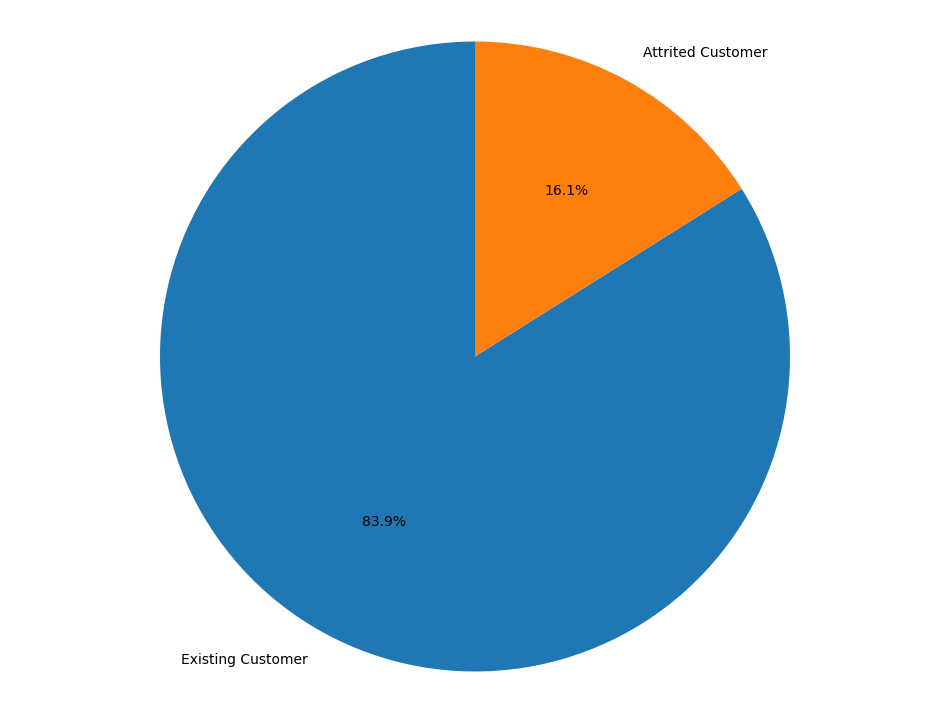

In [ ]:
# Making a pie chart to display the percentage distribution of the target variable
labels = 'Existing Customer', 'Attrited Customer'
sizes = [data.Attrition_Flag[data['Attrition_Flag']=='Existing Customer'].count(), data.Attrition_Flag[data['Attrition_Flag']=='Attrited Customer'].count()]
fig1, ax1 = plt.subplots(figsize=(12, 9))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')
plt.show()

# Pearson Correlation

In [ ]:
data.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

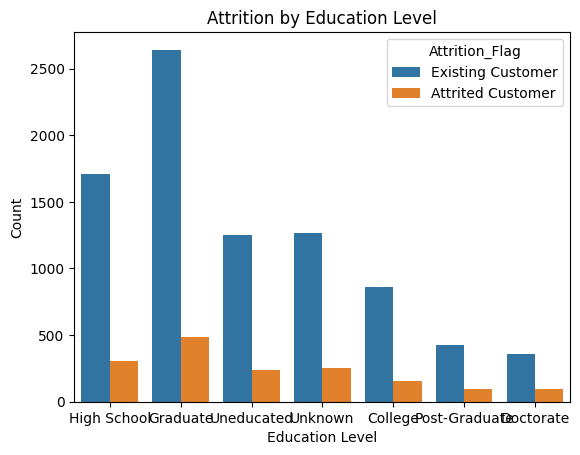

In [15]:
sns.countplot(data=data, x='Education_Level', hue='Attrition_Flag')

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Attrition by Education Level')
plt.show()


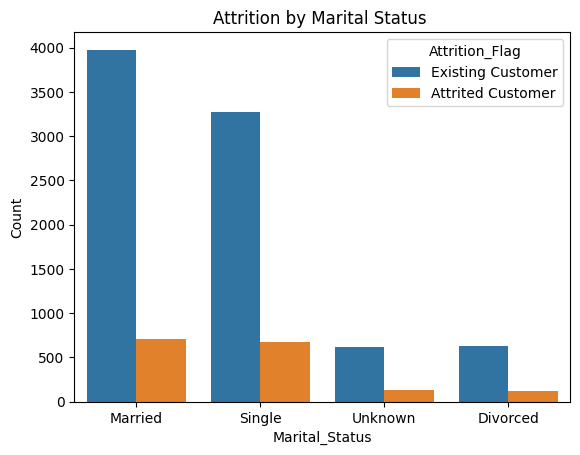

In [16]:
sns.countplot(data=data, x='Marital_Status', hue='Attrition_Flag')

plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title('Attrition by Marital Status ')
plt.show()


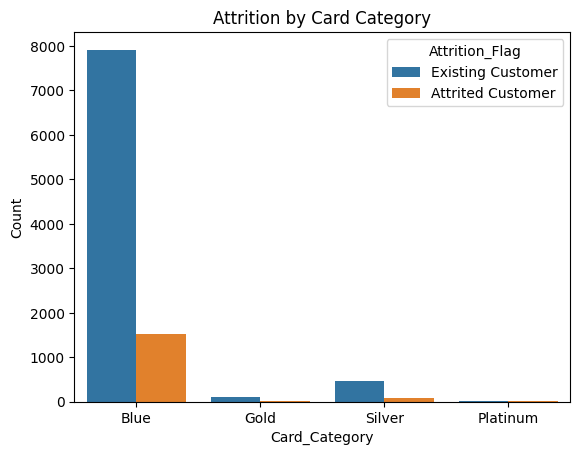

In [17]:
sns.countplot(data=data, x='Card_Category', hue='Attrition_Flag')

plt.xlabel('Card_Category')
plt.ylabel('Count')
plt.title('Attrition by Card Category')
plt.show()


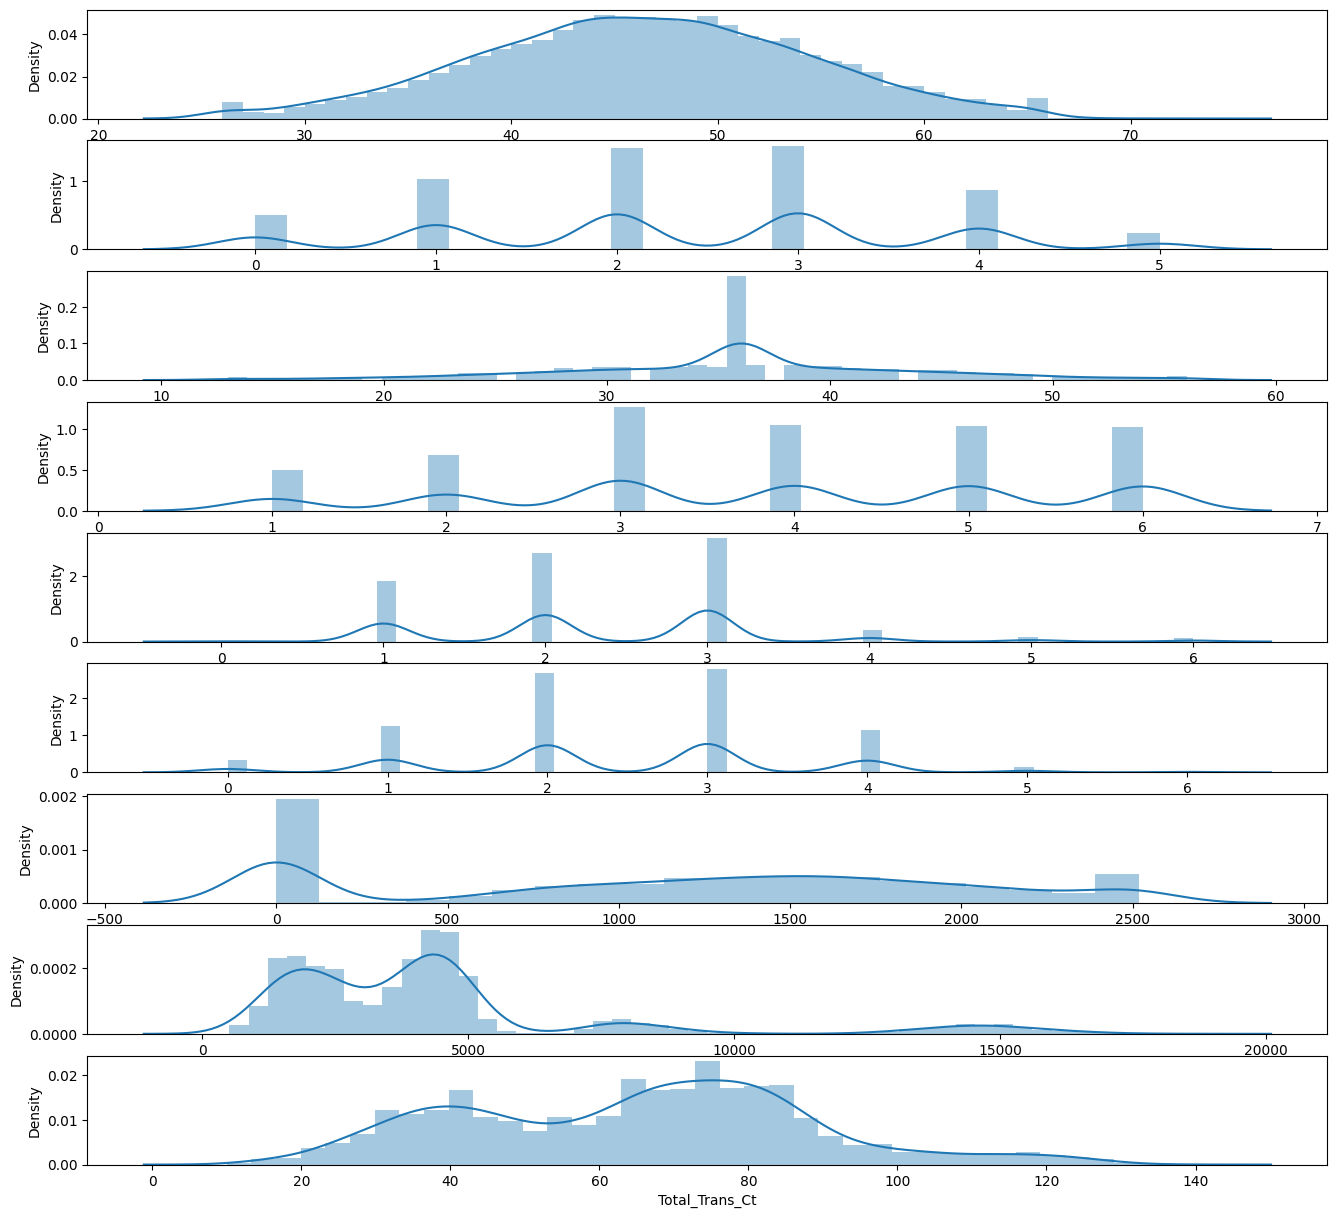

In [20]:
# Distribution Plot

fig, axs = plt.subplots(9, 1, figsize = (16, 15))

plt1 = sns.distplot(data['Customer_Age'], ax = axs[0])
plt1 = sns.distplot(data['Dependent_count'], ax = axs[1])
plt1 = sns.distplot(data['Months_on_book'], ax = axs[2])
plt1 = sns.distplot(data['Total_Relationship_Count'], ax = axs[3])
plt1 = sns.distplot(data['Months_Inactive_12_mon'], ax = axs[4])
plt1 = sns.distplot(data['Contacts_Count_12_mon'], ax = axs[5])
plt1 = sns.distplot(data['Total_Revolving_Bal'], ax = axs[6])
plt1 = sns.distplot(data['Total_Trans_Amt'], ax = axs[7])
plt1 = sns.distplot(data['Total_Trans_Ct'], ax = axs[8])
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2


In [ ]:
# Handle missing values
# There are NO missing values

In [49]:
# Label encoding for categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])
data['Education_Level'] = label_encoder.fit_transform(data['Education_Level'])
data['Card_Category'] = label_encoder.fit_transform(data['Card_Category'])
data['Income_Category'] = label_encoder.fit_transform(data['Income_Category'])
data['Attrition_Flag'] = label_encoder.fit_transform(data['Attrition_Flag'])


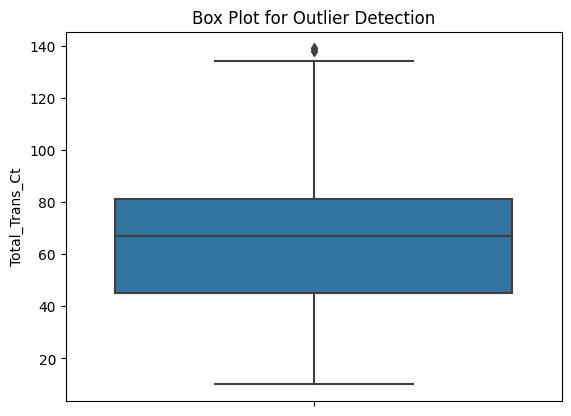

In [24]:
sns.boxplot(data=data, y='Total_Trans_Ct')
plt.title('Box Plot for Outlier Detection')
plt.show()


In [50]:
# Feature selection
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']
X_new = SelectKBest(chi2, k=10).fit_transform(X, y)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [52]:
# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naïve Bayes': GaussianNB(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
    }

In [55]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f1_score(y_test, y_pred))

Model: Logistic Regression
0.9296013570822731
Model: Naïve Bayes
0.9279722302574486
Model: SVM
0.9122147651006712
Model: KNN
0.9389752446747265
Model: Decision Tree
0.9544648137196925


In [56]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.41      0.52       327
           1       0.89      0.97      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.80      0.69      0.72      2026
weighted avg       0.86      0.88      0.86      2026

Model: Naïve Bayes
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       327
           1       0.91      0.94      0.93      1699

    accuracy                           0.88      2026
   macro avg       0.78      0.74      0.75      2026
weighted avg       0.87      0.88      0.87      2026

Model: SVM
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       327
           1       0.84      1.00      0.91      1699

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg     

In [ ]:
# Q.4 i would use F1 score as my evaluation metric and others

In [ ]:
# FINAL INSIGHTS:
# Q.5 A. I WOULD CHOOSE DECISION TREES MODEL FOR DEPLOYMENT BECAUSE IT HAS HIGHEST ACCURACY IN ALL ASPECTS

In [ ]:
# Q.5 b. i think SVM is underfitting because both precision and recall for "0" are zero